Christopher Jason Pierre-Samuel

School of Physics and Astronomy, Queen Mary University of London
, Mile End Rd, Bethnal Green, London E1 4NS

## Analysing the efficacy of built-in Python functions and constructed algorithms within various mathematical cases

## Introduction

The following report aims to analyse the variance between built-in functions and constructed algorithms with respect to time, accuracy and applicability. Observing the limitations and benefits of said methods with regards to mathematical problems in order to communicate the more effective approach to solve it. Followed by a discussion on why the results may have occurred, in addition to, stating recommendations on how improvements may be incorporated.  Concluding on a consensus on when techniques should be incorporated. This is important because an understanding of the topic may have potential to limit approaches and increase efficiency of calculations.

## Methods

In [1]:
from numpy import pi, sin, cos, exp, logspace, vectorize, linspace, sqrt 
from pylab import plot, grid, xlim, ylim, loglog, xlabel, ylabel, title, legend, linalg, array 
from scipy import optimize
from scipy.integrate import quad, simps 
import timeit, matplotlib.pyplot as plt 

From the start of the investigation functions all the functions were imported from; numpy, pylab, scipy, scipy.integrate, matplotlib, in addition to, timeit. The functions would be used to carry out calculation of values or parameterise diagrams that can be found in the results section. This was done to reduce repeated code.   

In [2]:
my_list = ['a', 'b', 'a', 'a', 'c']
my_set = set(my_list)

Following on, a test was implemented to see how long it would take to locate the string ‘c’ in the list, my_list, and the set of my_list, my_set. Using timeit [1] on each produced a time for each process to complete. 

In [3]:
start1 = timeit.default_timer()
def sine_sum(x):
    a = x
    s = a  
    for i in range(2,100):
        a *= ( -x**2 )/ ((((2 * i) - 1) * ((2 * i) - 2)))
        s += a
    return s
end1 = timeit.default_timer()

Next,  the recursive relation $$
t_{n} = t_{n-1} \times \frac{-x^2}{(2n - 1)(2n - 2)}.
$$ is used to defined to calculate a value of sin in the above code. Also, the function has timeit.default_timer() at the start and end of the function where the difference is taken to get an approximate time elapsed.

In [4]:
sine_sum = vectorize(sine_sum)
x = linspace(1,40,1000) # choose some appropriate values here
y_series = sine_sum(x)
y_library = sin(x)

Using the above defined function, It was vectorised to make it cope with array arguments. A range of x from 1 to 40 with 1000 steps was created using linspace and was used to prepare y values for the recursive relation (sine_sum) and the built in function sin from numpy. They were plotted with both x,y axis’ limited.

In [5]:
def FD(f, x, h):
    """Docstring goes here"""
    a = f(x + h)
    b = f(x)
    c = (a - b) / h
    return c 

def CD(f, x, h):
    a = f(x + 0.5 * h)
    b = f(x - 0.5 * h)
    c = (a - b) / h
    return c

def ED(f, x, h):
    a = 4 * CD(f, x, h/2)
    b = CD(f, x,  h)
    c = (a - b)/3
    return c

Moving on, numerical differentiation methods are defined for forward, central and extrapolated differences. They were compared in the results to discern which method gave the most accurate and fastest result.

In [6]:
test_f = cos   # choose an appropriate function here
x0 = 0.1       # where will we evaluate this function?
fx0p = -sin(x0)     # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = []
cd_errors = []
ed_errors = []
# We will collect the epsilon values for the FD method in this list. 
# You may like to set up similar lists for other methods.

for h in hh:
    fd_estimate = FD(test_f, x0, h)
    cd_estimate = CD(test_f, x0, h)
    ed_estimate = ED(test_f, x0, h) # calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    fd_error = (fd_estimate - fx0p)/fx0p
    cd_error = (cd_estimate - fx0p)/fx0p  
    ed_error = (ed_estimate - fx0p)/fx0p
    #... # calculate epsilon for the FD method here.
    # And perhaps for other methods...
    
    fd_errors.append(abs(fd_error))
    cd_errors.append(abs(cd_error))
    ed_errors.append(abs(ed_error))
    # We append the absolute value of epsilon to our list of errors.

The next step was to calculate the error $\epsilon$ in each of the method by calculation of the approximate value, and determinining the percentage error. Then the absolute percentage error was appended to their respective list.

In [7]:
#Root finding (1) Bisection
def bisection_step(f, bounds):
    lower, upper = bounds      # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper)/2 # Calculate the midpoint
    
    if f(lower) * f(middle) < 0: # We want this code to run if f(l) and f(m) have opposite signs. Fill in the condition here
        return (lower, middle)
    else:
        return (middle, upper) # Fill in an appropriate return value here if the condition is false
    
def regula_falsi_step(f, bounds):
    lower, upper = bounds
    midpoint = ((lower * f(upper)) - (upper * f(lower))) / (f(upper) - f(lower)) #?
    if  f(lower) * f(midpoint) < 0:
        return (lower, midpoint)
    else:
        return (midpoint, upper)

def newton_step(f, fp, x0):
    x1 = x0 - (f(x0) / fp(x0))
    return x1

The above code defines the bisection, regular falsi, and newton step methods of root finding with each of their respective equations for the latter two: $$
m = \frac{lf(u) - uf(l)}{f(u)-f(l)}:
$$

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$


In [8]:
def trapezoid(d, h):
    d = array(d)
    w = array([0.5] + (len(d)-2)*[1] +[0.5])
    return h*sum(d*w)

def simpson(d, h):
    if len(d)%2 != 1:
        return None
    d = array(d)
    w = (1/3)*array([1]  + (int((len(d)-3)/2)) * [4,2] + [4,1])
    return h * sum(d*w)

The next topic of interest was integration. Both the trapezoid and simpson methods were compared to display their precision. In addition the built-in python function was also used to determine the simpsons value 

In [9]:
trap_error = []
simp_error = []

for n in logspace(1,7,7):
    x = linspace(0, pi/2, n)
    y = cos(x)
    
    trap_error_n = abs((trapezoid(y, x[1] - x[0]) - cos(0) ))
    trap_error.append(trap_error_n)
    
    xs = linspace(0, pi/2, n+1)
    y = cos(xs)
    simp_error_n = abs((simpson(y, xs[1] - xs[0]) - cos(0))) 
    simp_error.append(simp_error_n)

C:\Users\CPier\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """
C:\Users\CPier\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


Furthermore, similar to the difference approximation graphs, another algorithm was constructed to calculate the value of error in the trapezoid and simpson method. First an empty list for each variable was created, followed by, a loop to calculate the magnitude of error over the number of steps append those values to a list. The list were later used to a graph to convey the change in error over the number of steps.

In [10]:
def Gaussian(f,lim):
    a, b = lim
    x = array([ (a + ((((1/2) + ((1/(2*sqrt(3)))))*(b-a)))),  (a + (((((1/2) - (1/(2*sqrt(3))))*(b-a)))))]) 
    w = array([1/2, 1/2])
    return ((b-a) *sum(w * f(x)))

Another more sofisticated method of numerical integration was the Gaussian quadrature as defined above. It was also used to calculate the approximate integral. Plus, the built-in quad function [4] was used to get an answer.

In [11]:
k = 1. 
m = 1.

def derivative_harmonic(t, x):
    x0, x1 = x
    dx0 =  x1
    dx1 = (-k/m) * x0
    return array((dx0, dx1))

This cell defines the derivative of a harmonic of the equations 
$$
\begin{align}
V(x) &= \tfrac12 k x^2 \\
F = m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx
\end{align}
$$

Moving on, the next calculations were approximations for harmonic motion, specificially the potential, kinetic and total energy. The processes used the second-order Runge-Kutta method and the Euler equation. The two graphs were compared to illustrate discrepencies between the two. 

## Results

In [12]:
%timeit 'c' in my_list
%timeit 'c' in my_set

95.3 ns ± 0.553 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
43.6 ns ± 1.68 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


$Result$ $1:$ This cell shows how the take that it takes to find the string ‘c’ in my_list and my_set. The result is displayed in that respective order

In [13]:
mytime = %timeit -o sin(0.5*pi)
print(sin(0.5*pi))
print(end1 - start1, sine_sum(0.5*pi))
print(abs(sine_sum(0.5*pi) - sin(0.5*pi))/sin(0.5*pi))
#Numerical error and timing

756 ns ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.0
9.450000000299497e-05 1.0000000000000002
2.220446049250313e-16


$Result$ $2:$ This result shows theapproximate time taken and value for the recursive relation calculation to compute the value of $
\sin x$ compared to the built-in function. In addition to the absolute value of error.


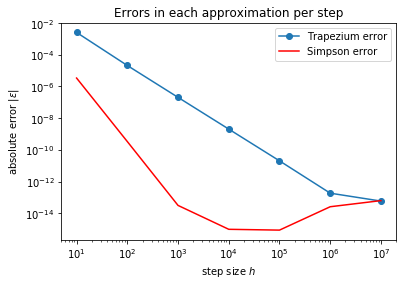

In [14]:
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')
title('Errors in each approximation per step' ) # Include an appropriate string for a graph title here.
loglog(logspace(1,7,7), trap_error, 'o-', label="Trapezium error")
loglog(logspace(1,7,7), simp_error, 'r-', label="Simpson error")
legend()

$Figure$ $1:$ This figure shows how the recursive relation diverges from the $sin$ function when it reaches a x value around 35.5. This 

In [15]:
#Numerical Differentiation, Forward difference
for n in range(-1,-10,-1):
    h = 10**n
    a = FD(sin, 0, h)
    print(a, h)

0.9983341664682815 0.1
0.9999833334166665 0.01
0.9999998333333416 0.001
0.9999999983333334 0.0001
0.9999999999833332 1e-05
0.9999999999998334 1e-06
0.9999999999999983 1e-07
1.0 1e-08
1.0 1e-09


$Result$ $3:$ This cells displays the forward difference values calculated of $Sin(0)$. This method produced the least accurate out of the three but did reach the exact answer given enough steps

In [16]:
#Numerical Differentiation, Central difference
for n in range(-1,-10,-1):
    h = 10**n
    a = CD(sin, 0, h)
    print(a, h)

0.9995833854135666 0.1
0.9999958333385416 0.01
0.9999999583333338 0.001
0.9999999995833334 0.0001
0.9999999999958332 1e-05
0.9999999999999583 1e-06
0.9999999999999996 1e-07
1.0 1e-08
1.0 1e-09


$Result$ $4:$ This cells displays the central difference calculation of $Sin(0)$. It was in the middle in terms of accuracy. 

In [17]:
#Numerical Differentiation, Forward difference
for n in range(-1,-10,-1):
    h = 10**n
    a = ED(sin, 0, h)
    print(a, h)

0.9999999869801354 0.1
0.9999999999986979 0.01
0.9999999999999999 0.001
1.0 0.0001
1.0 1e-05
1.0000000000000002 1e-06
1.0 1e-07
1.0 1e-08
1.0 1e-09


$Result$ $5:$ This cells displays the extrapolated difference results of $Sin(0)$ This method produces the most accurate results the fastest. This is due to the complexity of the function. However, this method will take the most time as it has the most calculations.   

In [18]:
start_FD = timeit.default_timer()
FD(sin, 0, 0.1)
end_FD = timeit.default_timer()

start_CD = timeit.default_timer()
CD(sin, 0, 0.1)
end_CD = timeit.default_timer()

start_ED = timeit.default_timer()
ED(sin, 0, 0.1)
end_ED = timeit.default_timer()

print(end_FD-start_FD, FD(sin, 0, 0.1))
print(end_CD-start_CD, CD(sin, 0, 0.1))
print(end_ED-start_ED, ED(sin, 0, 0.1))
print(cos(0)) # The derivative of sin is cos and it is evaluated at 0

6.490000000525242e-05 0.9983341664682815
7.64999999987026e-05 0.9995833854135666
4.99999999945544e-05 0.9999999869801354
1.0


$Result$ $6:$ The above result shows the time [1] each numerical differentiation method takes to complete computation with the calculated value beside it, with the explicit derivative at the bottom for comparison.

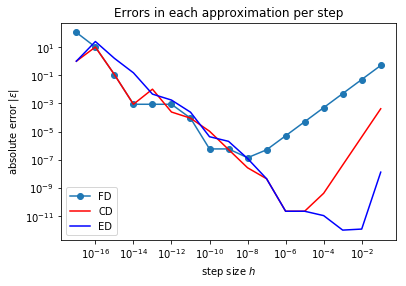

In [19]:
loglog(hh, fd_errors, 'o-', label="FD")
loglog(hh, cd_errors, 'r-', label="CD")
loglog(hh, ed_errors, 'b-', label="ED")# Same syntax as plot. The label is used in the legend.
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')
title('Errors in each approximation per step' ) # Include an appropriate string for a graph title here.
legend() #lab05

$Figure$ $2:$ This figure displays the absolute error of calculating approximations using; forward difference, central difference and extrapolated difference with a key displayed in the bottom left corner to identify them. From the graph it can be determined that extrapolated difference produced the lowest errors for fewest steps. 

In [20]:
def f(x):
    return x**2 - 4

l, u = 0, 5 
steps = 0
while u - l > 1e-8:
    l, u = bisection_step(f, (l, u))
    steps += 1
print(steps,l) 

29 1.9999999925494194


$Result$ $6:$ The code in this cell defines the bisection method to locate a potential root. The function was used in a while loop to get a result that converged to a root where the difference between limits had to less than 1e-8. The result plus amount of steps was printed at the end.

In [21]:
lower, upper = 0, 5
s = 0
while abs(f(lower)) > 1e-8 and abs(f(upper)) > 1e-8:
    #regula_falsi_step(f, (lower, upper))
    s += 1
    lower, upper = regula_falsi_step(f, (lower, upper))
print(s, lower, upper) #lab04

26 1.9999999989169126 5


$Result$ $7:$ The above codeshows an example of the regula-falsi method and produces a potential root in addition to the amount of steps to get within a desired degree of accuracy.

In [22]:
def f(x):                        #A function of x
    return x0**2 - 2             
def fp(x):                       #Derivative of the function
    return 2*x0
x0 = 2 
s = 0
a = newton_step(f, fp, x0)
start3 = timeit.default_timer()
while abs(x0 - a) > 1e-8:
    s += 1
    a = x0
    x0 = newton_step(f, fp, x0)
end3 = timeit.default_timer()
print(x0, end3 - start3)

1.4142135623730951 6.210000000095306e-05


In [23]:
print(optimize.newton(f,x0,fp, fprime2 = lambda x: 2)) 
mytime = %timeit -o optimize.newton(f,x0,fp, fprime2 = lambda x: 2)

1.414213562373095
1.99 µs ± 91.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


$Result$ $8:$ This code specifies Newton-Raphson method of linearising a function at a guess to determine a probable root. The built-in function optimize is also used to determine the root value. Next to the printed results are the times taken to complete each task. The built-in function having a speed much faster.  

## Solving Roots of $f(x) = x^2 - 2$ with guesses
| Initial Guess ($x_o$)  | Number of iterations |  Root Found  | Comment |
|----|----|----|----|
| 1   |   5  |1.4142135623730951  | Converges to a root in only 5 steps with high precision|
| 1e5 |  21   |   1.4142135623730951  |Takes a large amount of iterations when compared to other guesses |
|  -1 |   5  |  -1.4142135623730951   | Converges to the negative solution with high precision|
| 0  |  unknown   | undefined    | division by 0 so it crashes  |
|  1e-5  |  22   |   1.4142135623730951  | Takes a considerable amount for very small values as well|


$Table$ $1:$ This table shows the result of solutions to the intial guesses to find the root using the Newton-Rhapson method, accompanied with, iterations and a statement.

In [24]:
x = linspace(0, pi/2, 100)
y = cos(x)
print(trapezoid(y, x[1] - x[0]))

x = linspace(0, pi/2, 101) # crashes on even numbers
print(simpson(cos(x), x[1] - x[0]))
simps(cos(x),x)

0.999979020750832
1.0000000003382359


1.0000000003382359

$Result$ $9:$ The results above show the approximate integral of the function stated and the built-in simps function which gave the same value as the defined function in method

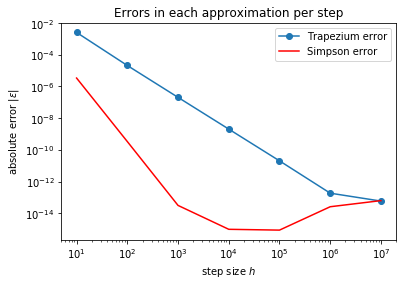

In [25]:
# Same syntax as plot. The label is used in the legend.
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')
title('Errors in each approximation per step' ) # Include an appropriate string for a graph title here.
loglog(logspace(1,7,7), trap_error, 'o-', label="Trapezium error")
loglog(logspace(1,7,7), simp_error, 'r-', label="Simpson error")
legend()

$Figure$ $3:$ A graph illustrating the errors in each approximation method over 1e7 steps. The disparity increased from the start position up to about 1e5 steps then began to converge until they intersected at 1e7. 

In [26]:
print(Gaussian(cos,(0, pi/2)))
quad(cos,0, pi/2)

0.9984726134041151


(0.9999999999999999, 1.1102230246251564e-14)

$Result$ $11:$ This code shows the results of Gaussian quadrature and quad [4].

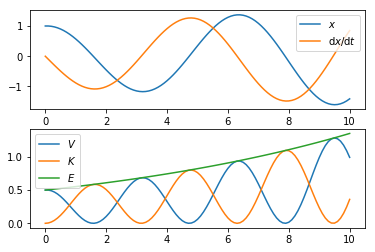

In [27]:
t_total = 10
dt = 0.1
t = 0
x = array((1., 0))
v = derivative_harmonic(t, x)

t_list = [t]       
x_list = [x.copy()] 
v_list = [v.copy()]     

for i in range(int(t_total/dt)):
    t += dt
    x = x+v*dt
    v = derivative_harmonic(t, x)
    t_list.append(t)
    x_list.append(x.copy())
    v_list.append(v.copy())

t_list = array(t_list)
x_list = array(x_list)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list[:,0], label="$x$")
plt.plot(t_list, x_list[:,1], label='$\\mathrm{d}x/\\mathrm{d}t$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, 0.5 * k * (x_list[:,0]**2), label="$V$")
plt.plot(t_list, 0.5 * m * (x_list[:,1]**2), label="$K$")
plt.plot(t_list,0.5 * k * (x_list[:,0]**2) + 0.5 * m * (x_list[:,1]**2) , label="$E$")
plt.legend()

$Figure$ $4:$ The graph on top displays the change in x over time and its derivative with respect to t as a function of time.
The graph below depicts the Euler approximation to calculate the potential (V), kinetic energy (K) and total energy (E). This has shown that there is an issue with using the Euler approximation in this approximation as energy is rising in the harmonic system and it is known that the energy of such a system must stay constant.

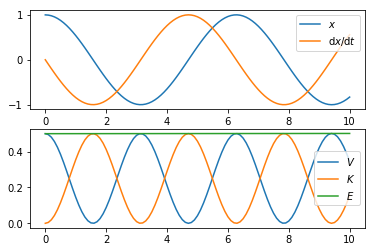

In [28]:
t_total = 10
dt = 0.1
t = 0
x = array((1., 0))
v = derivative_harmonic(t, x)

t_list = [t]       
x_list = [x.copy()] 
v_list = [v.copy()]     

for i in range(int(t_total/dt)):
    t_int = t + (0.5 * dt) 
    x_int = x + (0.5 * v * dt)
    v_int = derivative_harmonic(t_int, x_int)
    t += dt
    x += v_int*dt
    v = derivative_harmonic(t, x)
    t_list.append(t)
    x_list.append(x.copy())
    v_list.append(v.copy())

t_list = array(t_list)
x_list = array(x_list)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list[:,0], label="$x$")
plt.plot(t_list, x_list[:,1], label='$\\mathrm{d}x/\\mathrm{d}t$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, 0.5 * k * (x_list[:,0]**2), label="$V$")
plt.plot(t_list, 0.5 * m * (x_list[:,1]**2), label="$K$")
plt.plot(t_list,0.5 * k * (x_list[:,0]**2) + 0.5 * m * (x_list[:,1]**2) , label="$E$")
plt.legend()

$Figure$ $5:$ This figure communicates the same graph as figure 3 but uses the second-order Runge-Kutta method. It displays a constant total energy level plus kinetic energy and potential alternating between maximum and minimum at the same time interval.

## Discussion

The significance of this investigation is that depending on the users understanding of the problem they may use the wrong approach leading to an incorrect solution or squander time.

As shown in the first result if the user searching for a specific string within a group, it may be easier to convert it inot a set in order to reduce time and resources used.

On another note, if precison is needed it is best to use the sophisticated algorithms or the built-in functions to make calculations as they have reduced error as shown in figure 1, 2 and 3. Moreover, the approximation is relient on the initial guess and depending on the method this can greatly change the amount of steps and resources used as shown in table 1. It may even crash if the guess causes an incalculable solutions.

## Conclusion

To conclude, this investigation shows that it is important to have good understanding of the problem that the user wants to solve, in order to make an informed decision on approach.

Further work would have to done in investigating the time of functions and the underlying algorithms of the built-in functions.

## References

1.) Stack Overflow. (2011). Measure time elapsed in Python?. [online] Available at: https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python [Accessed 15 May 2019].

2.) Docs.python.org. (2018). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.7.3 documentation. [online] Available at: https://docs.python.org/3.7/tutorial/floatingpoint.html [Accessed 15 May 2019].

3.) Docs.scipy.org. (2017). scipy.integrate.simps — SciPy v1.3.0 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html [Accessed 16 May 2019].

4.) Docs.scipy.org. (2017). scipy.integrate.quad — SciPy v1.3.0 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html [Accessed 16 May 2019].

In [29]:
import nbformat
def word_count(notebook):
    """Prints the word count in Markdown cells of the file named notebook."""
    with open(notebook, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    word_count = 0
    total_word_count = 0
    for cell in nb['cells']:
        if cell['cell_type'] == "markdown":
            lines = cell['source'].split('\n')
            for line in lines:
                if len(line) > 0 and line[0] == '#':
                    print(word_count)
                    total_word_count += word_count
                    word_count = 0
                    print(line.strip(), end=" ==> ")
                else:
                    word_count += len(line.lstrip().split(' '))
    print(word_count)
    print("Total ==> ", total_word_count)
word_count('C:\\Users\\CPier\\ap16178\\FinalProject.ipynb')

23
## Analysing the efficacy of built-in Python functions and constructed algorithms within various mathematical cases ==> 0
## Introduction ==> 98
## Methods ==> 526
## Results ==> 407
## Solving Roots of $f(x) = x^2 - 2$ with guesses ==> 361
## Discussion ==> 142
## Conclusion ==> 52
## References ==> 76
Total ==>  1609
